In [2]:
#!pip install --upgrade pip
!pip install pandas matplotlib seaborn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
import pandas as pd  # For Data Manipulation
import numpy as np  # For Array Manipulation

#import calendar  # For Month Manipulation

import matplotlib.pyplot as plt  # For Data Visualization
#import seaborn as sb  # For Data Visualization

In [26]:
music = pd.read_csv(r"mxmh_survey_results.csv", encoding= "Latin-1")

In [27]:
music.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
251,8/28/2022 23:42:24,20.0,Spotify,2.0,Yes,Yes,No,EDM,No,Yes,...,Never,Never,Sometimes,Sometimes,9.0,7.0,5.0,7.0,Improve,I understand.
355,8/29/2022 10:25:54,24.0,Other streaming service,1.5,Yes,No,No,Video game music,No,Yes,...,Sometimes,Sometimes,Very frequently,Very frequently,3.0,4.0,1.0,1.0,Improve,I understand.
334,8/29/2022 7:48:34,40.0,Spotify,6.0,Yes,No,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Rarely,10.0,7.0,3.0,3.0,No effect,I understand.
319,8/29/2022 5:14:53,15.0,Spotify,4.0,Yes,No,Yes,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Never,8.0,6.0,4.0,0.0,Improve,I understand.
105,8/28/2022 16:07:28,21.0,YouTube Music,2.0,Yes,Yes,No,Metal,Yes,Yes,...,Never,Rarely,Sometimes,Very frequently,8.0,4.0,10.0,0.0,No effect,I understand.


In [ ]:
music.info()

In [ ]:
music = music.dropna(axis= 0)
music['Mental Health'] = music['Anxiety'] + music['Depression'] + music['Insomnia'] + music['OCD']
music.head()

In [ ]:
cols = list(music.columns.values)
cols

In [ ]:
music['Fav genre'].unique()

In [ ]:
fav_genre = music.groupby('Fav genre')

video_game = fav_genre.get_group('Video game music')
jazz = fav_genre.get_group('Jazz')
rnb = fav_genre.get_group('R&B')
k_pop = fav_genre.get_group('K pop')
rock = fav_genre.get_group('Rock')
edm = fav_genre.get_group('EDM')
country = fav_genre.get_group('Country')
hip_hop = fav_genre.get_group('Hip hop')
rap = fav_genre.get_group('Rap')
pop = fav_genre.get_group('Pop')
classical = fav_genre.get_group('Classical')
metal = fav_genre.get_group('Metal')
folk = fav_genre.get_group('Folk')
lofi = fav_genre.get_group('Lofi')
gospel = fav_genre.get_group('Gospel')
latin = fav_genre.get_group('Latin')

video_game.describe()

In [ ]:
video_game_stat = video_game.describe().transpose()
jazz_stat = jazz.describe().transpose()
rnb_stat = rnb.describe().transpose()
k_pop_stat = k_pop.describe().transpose()
rock_stat = rock.describe().transpose()
edm_stat = edm.describe().transpose()
country_stat = country.describe().transpose()
hip_hop_stat = hip_hop.describe().transpose()
rap_stat = rap.describe().transpose()
pop_stat = pop.describe().transpose()
classical_stat = classical.describe().transpose()
metal_stat = metal.describe().transpose()
folk_stat = folk.describe().transpose()
lofi_stat = lofi.describe().transpose()
gospel_stat = gospel.describe().transpose()
latin_stat = latin.describe().transpose()
latin_stat

In [ ]:
x = pop['Hours per day']
y = pop['Mental Health']
plt.scatter(x, y)
plt.xlabel("Hours Listened per Day")
plt.ylabel("Depression")
plt.title("Hours Listened vs Depression (Classical)")
plt.show()

In [ ]:

#Based on the frequency of classical (all genres) 

#of music shows improvement (no improvement) with anxiety, aggression, insomnia and or OCD?

#If listening to (given genre) several hours per day this will improve or not improve the mental outcome

#How likely is someone going to listen to a specific genre of music?

#If a higher or lower age group listens (name of genre) this will have a negative or positive impact on mental functioning.

#BPM (beats per minute) over 100 to reflect anxiety, aggression, insomnia and or OCD?

#Data profiling to clean any missing data -- like on a given day where data is missing 

#How can this influence the data and results of music impacting mental functioning 


In [ ]:
#Popular genre across age group
def age_group(age):
    if age <= 18:
        return "0-18"
    elif age > 18 and age <=35:
        return "18-35"
    elif age > 35 and age <=100:
        return "35-100"
    else:
        return "error"

In [ ]:
music['age_grp'] = music['Age'].apply(age_group)
music = music[music['age_grp'] != 'error']

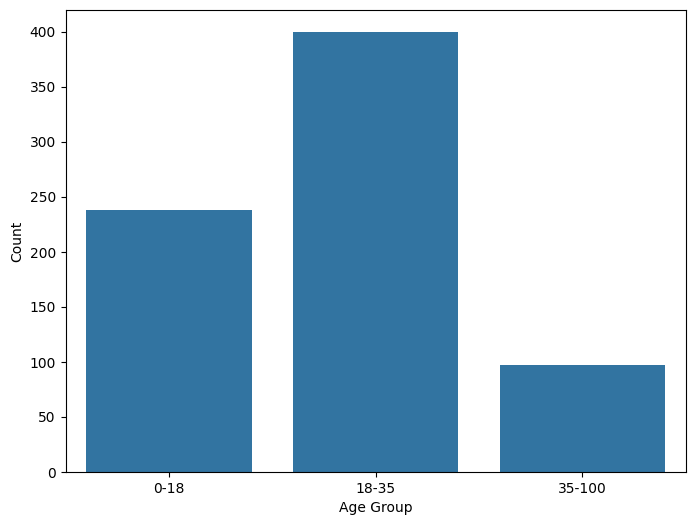

In [ ]:
age_grp_counts = music['age_grp'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,6))
sns.barplot(x=age_grp_counts.index, y=age_grp_counts.values)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [ ]:
music.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'age_grp'],
      dtype='object')

In [ ]:
print(music['age_grp'].head(5))

0      0-18
1    35-100
2      0-18
3    35-100
4      0-18
Name: age_grp, dtype: object


In [3]:
#added code 12/31/2023

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
music_df =  pd.read_csv("mxmh_survey_results.csv", encoding="Latin-1")

In [5]:
print(music_df.columns)

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


In [6]:
unique_responses = music_df['Frequency [Classical]'].unique()
print(unique_responses)

['Rarely' 'Sometimes' 'Never' 'Very frequently']


### Data Preparation

Step 1 - Add age group to make it categorical

Step 2 - Make features numerical to make it easy for analysis

Step 3 - Replace nulls will appropriate values

In [7]:
def calc_age_group(age: int):
	if age > 0 and age < 19:
		return "0 - 18"
	elif age < 37:
		return "19 - 36"
	elif age < 61:
		return "37 - 60"
	else:
		return "60+"

def reset_df() -> pd.DataFrame:
	df = music_df.copy()

	music_mapping = {'Improve': 1, 'Worsen': -1, 'No effect': 0}
	# Map string values to numerical values
	frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
	# Map string values to numerical values
	yes_no_mapping = {'Yes': 1, 'No': 0}

	# Define the bins and labels
	bins = [0, 2, 4, 6, 8, 10, 16, 24]
	labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-16', '16-24']

	df['Listening Hours Category'] = pd.cut(df['Hours per day'], bins=bins, labels=labels, right=False)

	df['Age Group'] = df['Age'].apply(calc_age_group)

	# Apply mapping to the 'Frequency [Classical]' column
	df['Frequency [Classical]'] = df['Frequency [Classical]'].map(frequency_mapping).astype(float)

	df['While working'] = df['While working'].map(yes_no_mapping)
	df['Instrumentalist'] = df['Instrumentalist'].map(yes_no_mapping)
	df['Composer'] = df['Composer'].map(yes_no_mapping)
	return df

### Question 1 - Popular Genre across age

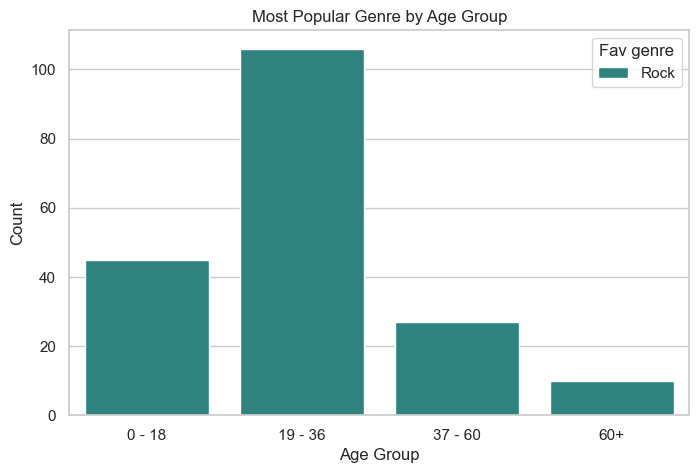

In [8]:
df = reset_df()
# Create a DataFrame for age groups and their popular genres
age_genre_counts = df.groupby(['Age Group', 'Fav genre']).size().reset_index(name='Count')
most_popular_genres = age_genre_counts.loc[age_genre_counts.groupby('Age Group')['Count'].idxmax()]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for the most popular genre by age group
plt.figure(figsize=(8, 5))
sns.barplot(x='Age Group', y='Count', hue='Fav genre', data=most_popular_genres, palette='viridis')

# Set plot labels and title
plt.title('Most Popular Genre by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

C:\Users\jsnow\AppData\Local\Temp\ipykernel_31044\1765625344.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fav genre', y='Count', data=genre_counts, palette='viridis')


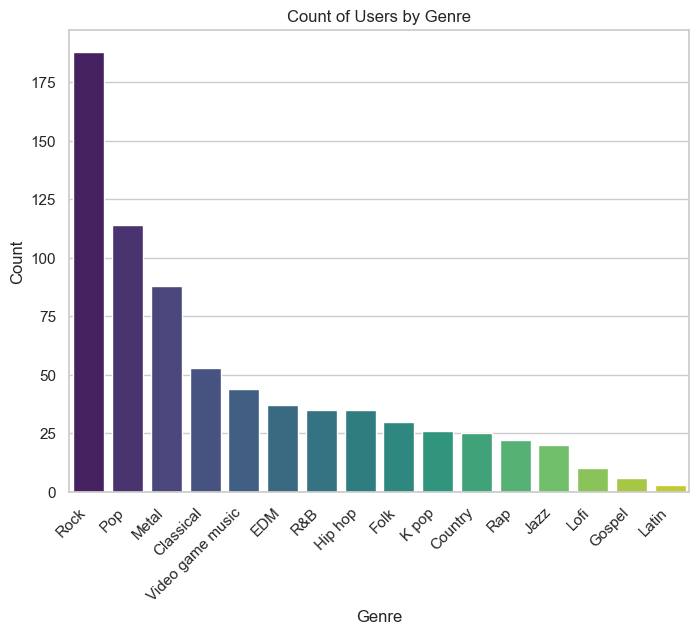

In [9]:
# Create a DataFrame for genre counts
genre_counts = df['Fav genre'].value_counts().reset_index(name='Count')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for genre counts
plt.figure(figsize=(8, 6))
sns.barplot(x='Fav genre', y='Count', data=genre_counts, palette='viridis')

# Set plot labels and title
plt.title('Count of Users by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [28]:
genre_counts

,Fav genre,Count
0,Rock,188
1,Pop,114
2,Metal,88
3,Classical,53
4,Video game music,44
5,EDM,37
6,R&B,35
7,Hip hop,35
8,Folk,30
9,K pop,26


### Question 2: Correlation between Classical and Medical Condition

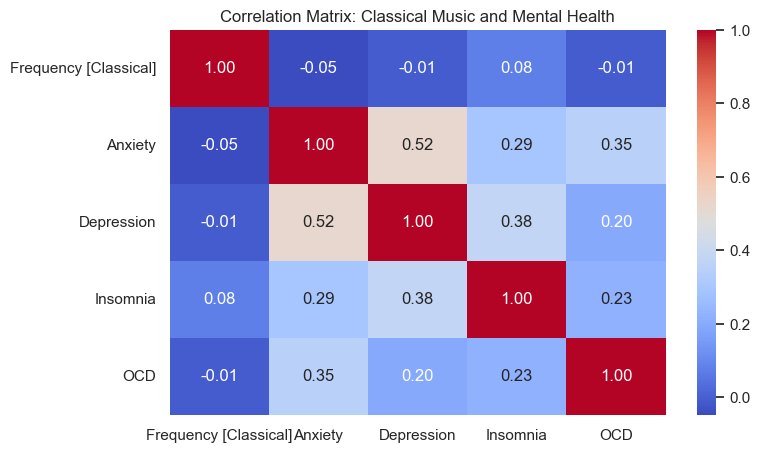

In [10]:
df = reset_df()

# Select the relevant columns for correlation calculation
selected_columns = ['Frequency [Classical]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

# Create a DataFrame with the selected columns
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Classical Music and Mental Health')
plt.show()

In [29]:
correlation_matrix

,Frequency [Classical],Anxiety,Depression,Insomnia,OCD
Frequency [Classical],1.000000,-0.047259,-0.008253,0.076474,-0.007941
Anxiety,-0.047259,1.000000,0.519969,0.292669,0.348350
Depression,-0.008253,0.519969,1.000000,0.378996,0.196988
Insomnia,0.076474,0.292669,0.378996,1.000000,0.226354
OCD,-0.007941,0.348350,0.196988,0.226354,1.000000


### Question 3: Popular Streaming Service by Age Group

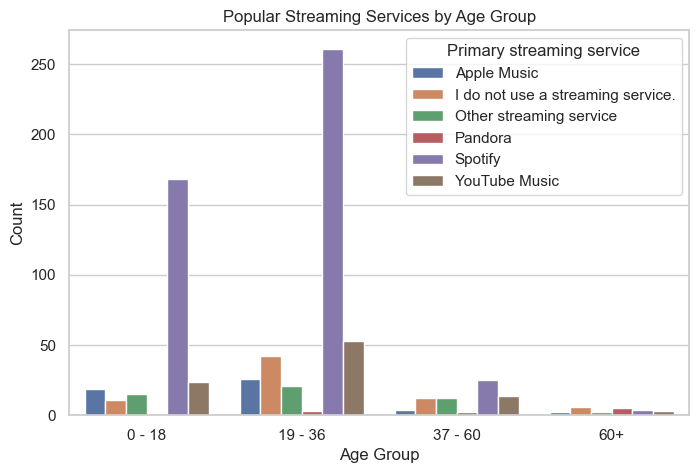

In [11]:
df = reset_df()

# Count the number of occurrences of each streaming service in each age group
age_service_counts = df.groupby(['Age Group', 'Primary streaming service']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x='Age Group', y='Count', hue='Primary streaming service', data=age_service_counts)
plt.title('Popular Streaming Services by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [30]:
age_service_counts

,Age Group,Primary streaming service,Count
0,0 - 18,Apple Music,19
1,0 - 18,I do not use a streaming service.,11
2,0 - 18,Other streaming service,15
3,0 - 18,Pandora,1
4,0 - 18,Spotify,168
5,0 - 18,YouTube Music,24
6,19 - 36,Apple Music,26
7,19 - 36,I do not use a streaming service.,42
8,19 - 36,Other streaming service,21
9,19 - 36,Pandora,3


### Question 4: Average time spent by people on music

In [12]:
df = reset_df()

avg_hours_listening = df['Hours per day'].mean()

print(f"Average hours spent on listening to music for Instrumentalists: {avg_hours_listening:.2f} hours")

Average hours spent on listening to music for Instrumentalists: 3.57 hours


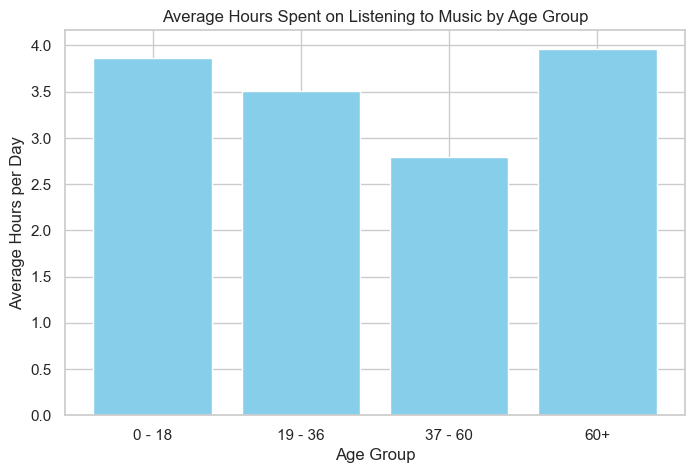

In [13]:
# Group by age and calculate the average hours spent on listening to music
grouped_data = df.groupby('Age Group')['Hours per day'].mean().reset_index()

# Plot the chart
plt.figure(figsize=(8, 5))
plt.bar(grouped_data['Age Group'], grouped_data['Hours per day'], color='skyblue')
plt.title('Average Hours Spent on Listening to Music by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Day')
plt.show()

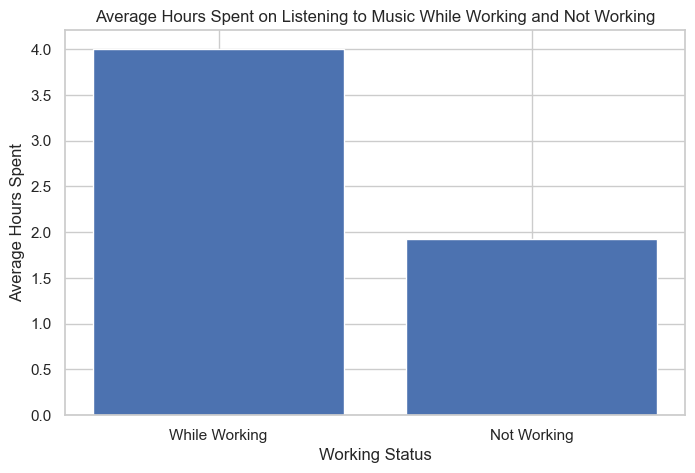

In [14]:
# Plot the average hours spent on listening to music while working and not working
avg_hours_working = df[df['While working'] == 1]['Hours per day'].mean()
avg_hours_not_working = df[df['While working'] == 0]['Hours per day'].mean()

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(['While Working', 'Not Working'], [avg_hours_working, avg_hours_not_working])
plt.xlabel('Working Status')
plt.ylabel('Average Hours Spent')
plt.title('Average Hours Spent on Listening to Music While Working and Not Working')
plt.show()

### Question 4.2 : Average time spent listening music based on listening preferences

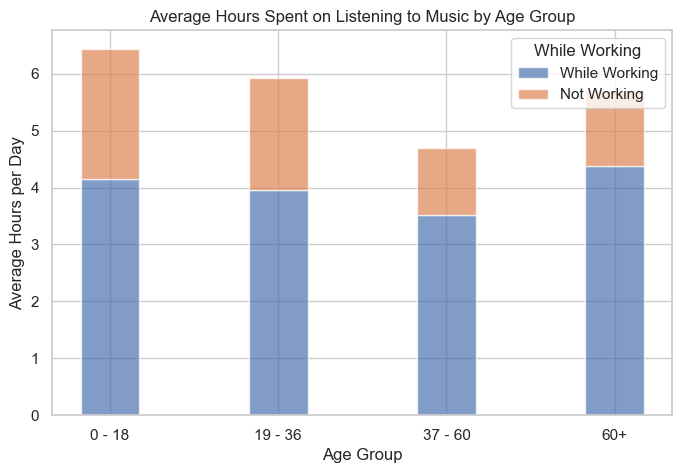

In [32]:
df = reset_df()

grouped_data = df.groupby(['Age Group', 'While working'])['Hours per day'].mean().unstack().reset_index()

# Plot the chart
plt.figure(figsize=(8, 5))
bar_width = 0.35
bar_positions = range(len(grouped_data['Age Group']))

plt.bar(bar_positions, grouped_data[True], width=bar_width, label='While Working', alpha=0.7)
plt.bar(bar_positions, grouped_data[False], width=bar_width, label='Not Working', alpha=0.7, bottom=grouped_data[True])

plt.title('Average Hours Spent on Listening to Music by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Day')
plt.xticks(bar_positions, grouped_data['Age Group'])
plt.legend(title='While Working')
plt.show()

In [33]:
grouped_data

While working,Age Group,0.0,1.0
0,0 - 18,2.291667,4.148515
1,19 - 36,1.960000,3.964839
2,37 - 60,1.175000,3.520833
3,60+,1.333333,4.381579


### Question 4.3 : Average time spent listening music for instrumentalist and preference

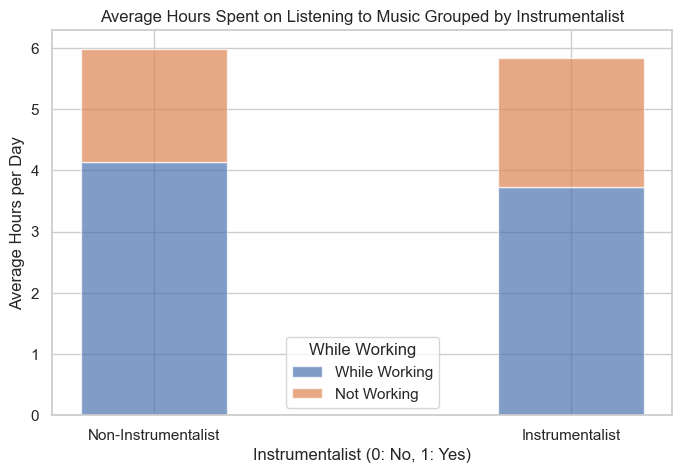

In [16]:
df = reset_df()

# Group by 'Instrumentalist' and calculate the average hours spent on listening to music
grouped_data = df.groupby(['Instrumentalist', 'While working'])['Hours per day'].mean().unstack().reset_index()

# Plot the chart
plt.figure(figsize=(8, 5))
bar_width = 0.35
bar_positions = range(len(grouped_data['Instrumentalist']))

plt.bar(bar_positions, grouped_data[True], width=bar_width, label='While Working', alpha=0.7)
plt.bar(bar_positions, grouped_data[False], width=bar_width, label='Not Working', alpha=0.7, bottom=grouped_data[True])

plt.title('Average Hours Spent on Listening to Music Grouped by Instrumentalist')
plt.xlabel('Instrumentalist (0: No, 1: Yes)')
plt.ylabel('Average Hours per Day')
plt.xticks(bar_positions, ['Non-Instrumentalist', 'Instrumentalist'])
plt.legend(title='While Working')
plt.show()

### Question 4.4 : Average time spent listening music for composer and preference

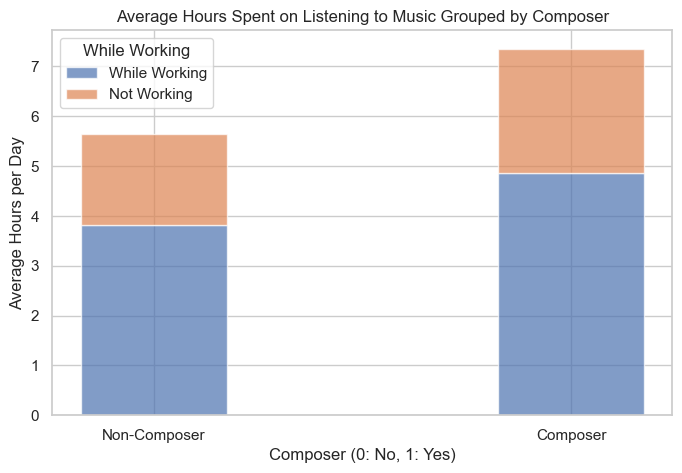

In [17]:
df = reset_df()

# Group by 'Composer' and calculate the average hours spent on listening to music
grouped_data = df.groupby(['Composer', 'While working'])['Hours per day'].mean().unstack().reset_index()

# Plot the chart
plt.figure(figsize=(8, 5))
bar_width = 0.35
bar_positions = range(len(grouped_data['Composer']))

plt.bar(bar_positions, grouped_data[True], width=bar_width, label='While Working', alpha=0.7)
plt.bar(bar_positions, grouped_data[False], width=bar_width, label='Not Working', alpha=0.7, bottom=grouped_data[True])

plt.title('Average Hours Spent on Listening to Music Grouped by Composer')
plt.xlabel('Composer (0: No, 1: Yes)')
plt.ylabel('Average Hours per Day')
plt.xticks(bar_positions, ['Non-Composer', 'Composer'])
plt.legend(title='While Working')
plt.show()

In [18]:
df = reset_df()

# Assuming df is your DataFrame with the music data
unique_genres = df['Fav genre'].unique()

# Print the unique genres and their count
print("Number of different genres:", len(unique_genres))
print("Unique genres:", unique_genres)

Number of different genres: 16
Unique genres: ['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']


### Question: Data discrepancies

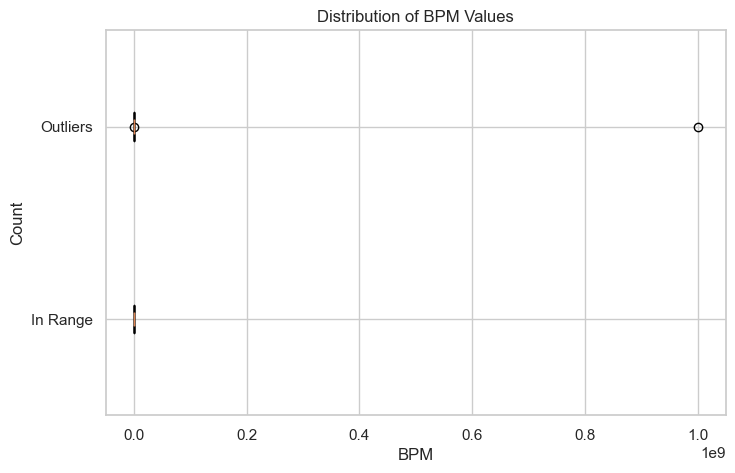

Percentage of People with Inaccurate BPM Values: 2.72%


In [19]:
df = reset_df()

# Assuming df is your DataFrame
min_bpm_threshold = 60
max_bpm_threshold = 200

# Identify inaccurate BPM values
inaccurate_bpm = df[(df['BPM'] < min_bpm_threshold) | (df['BPM'] > max_bpm_threshold)]
accurate_bpm = df[(df['BPM'] >= min_bpm_threshold) & (df['BPM'] <= max_bpm_threshold)]

# Plot a box plot with counts on y-axis
plt.figure(figsize=(8, 5))
plt.boxplot([accurate_bpm['BPM'], inaccurate_bpm['BPM']], vert=False, labels=['In Range', 'Outliers'], notch=True)
plt.title('Distribution of BPM Values')
plt.xlabel('BPM')
plt.ylabel('Count')
plt.show()

# Display the percentage of people with inaccurate BPM values
total_people = len(df)
people_with_inaccurate_bpm = len(inaccurate_bpm)
percentage_inaccurate_bpm = (people_with_inaccurate_bpm / total_people) * 100
print(f"Percentage of People with Inaccurate BPM Values: {percentage_inaccurate_bpm:.2f}%")

In [20]:
print("Users with Outlier BPM Values:")
print(inaccurate_bpm[['Timestamp', 'BPM']])

Users with Outlier BPM Values:
              Timestamp          BPM
58   8/28/2022 13:09:53         55.0
214  8/28/2022 21:48:12         52.0
248  8/28/2022 23:34:19        220.0
339   8/29/2022 8:37:30          0.0
353  8/29/2022 10:23:22        208.0
372  8/29/2022 15:05:22         20.0
421  8/30/2022 13:07:20         40.0
427  8/30/2022 17:33:13         55.0
429  8/30/2022 18:15:39          4.0
498   9/1/2022 22:38:20        204.0
524    9/2/2022 9:15:48          0.0
564   9/4/2022 10:48:55        210.0
567   9/4/2022 13:07:45          8.0
568   9/4/2022 15:41:59  999999999.0
594   9/8/2022 15:06:09         56.0
610   9/10/2022 9:06:07        220.0
639  9/12/2022 22:26:06          0.0
644   9/13/2022 1:55:43        624.0
662   9/14/2022 0:58:57        218.0
711   10/4/2022 8:12:33        210.0


### Inaccurate listening hours

In [21]:
# Define the range for accurate hours
lower_limit = 0
upper_limit = 24

# Filter DataFrame to get inaccurate hours
inaccurate_hours = df[(df['Hours per day'] < lower_limit) | (df['Hours per day'] > upper_limit)]

# Print users who are outliers based on inaccurate hours spent on listening
print("Users with Outlier Hours Spent Values:")
print(inaccurate_hours[['Timestamp', 'Hours per day']])

Users with Outlier Hours Spent Values:
Empty DataFrame
Columns: [Timestamp, Hours per day]
Index: []


### Users by daily hours spent on music

C:\Users\jsnow\AppData\Local\Temp\ipykernel_31044\372712649.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df.groupby('Listening Hours Category').size().reset_index(name='Count')


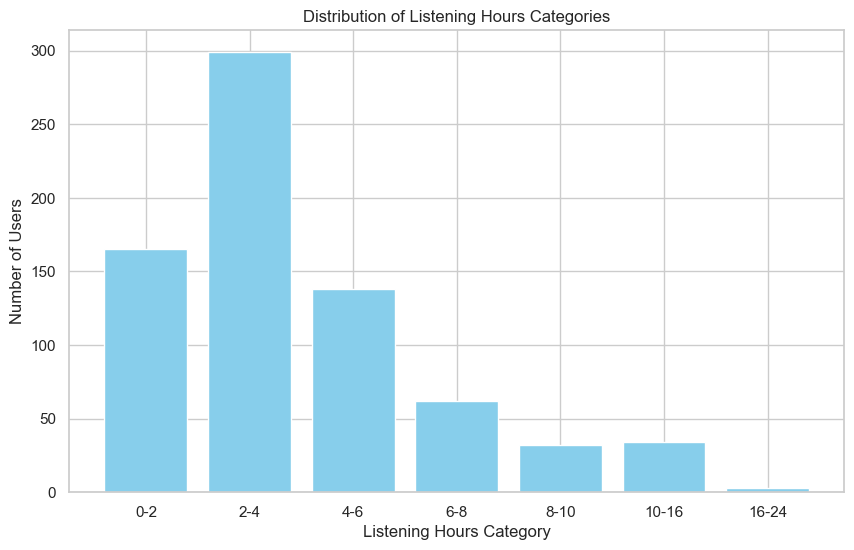

In [22]:
# Group by 'Listening Hours Category' and calculate the count
category_counts = df.groupby('Listening Hours Category').size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Listening Hours Category'], category_counts['Count'], color='skyblue')
plt.title('Distribution of Listening Hours Categories')
plt.xlabel('Listening Hours Category')
plt.ylabel('Number of Users')
plt.show()

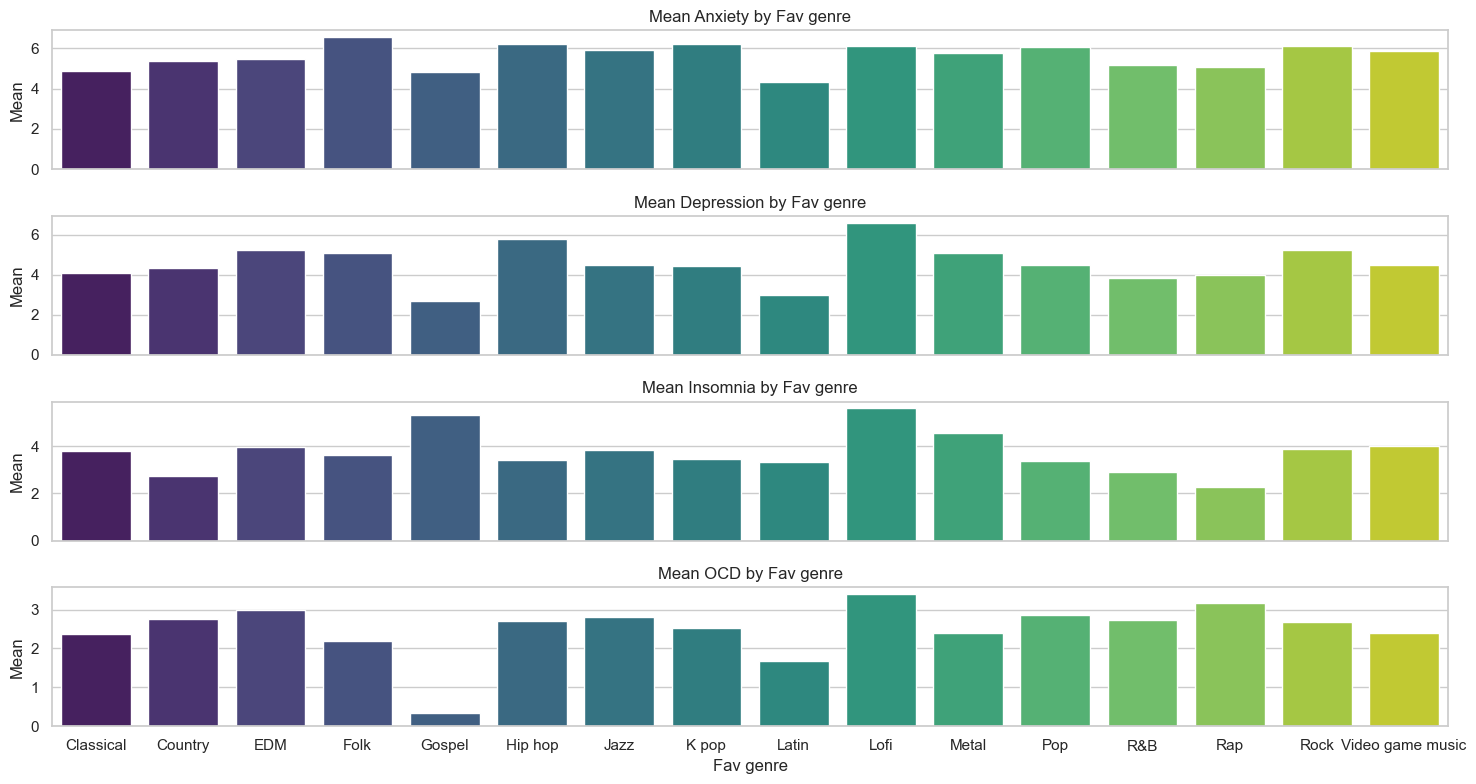

In [34]:
# Assuming 'Fav genre' is the column representing music genres
# You can replace it with the actual column name in your dataset
fav_genre_column = 'Fav genre'

# List of health conditions
health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Create subplots for each health condition
fig, axes = plt.subplots(nrows=len(health_conditions), ncols=1, figsize=(15, 8), sharex=True)

# Iterate over each health condition
for i, condition in enumerate(health_conditions):
    # Group by 'Fav genre' and calculate the mean for the health condition
    genre_health_data = df.groupby(fav_genre_column)[condition].mean().reset_index()
    
    # Plot the bar chart
    sns.barplot(x=fav_genre_column, y=condition, data=genre_health_data, hue=fav_genre_column, ax=axes[i], palette='viridis', legend=False)
    
    # Set title and labels
    axes[i].set_title(f'Mean {condition} by {fav_genre_column}')
    axes[i].set_ylabel('Mean')

# Set common x-axis label
plt.xlabel(f'{fav_genre_column}')
plt.tight_layout()
plt.show()
